In [1]:
import pyvisgraph as vg

graph = vg.VisGraph()

graph.build([[vg.Point(0, 0), vg.Point(10, 0), vg.Point(10, 10), vg.Point(0, 10)]], workers=1, status=True)

print(graph.shortest_path(vg.Point(200, 0), vg.Point(-200, 10)))

import folium

geoplot = folium.Map(location=[0, 0], zoom_start=2)

for edge in graph.visgraph.get_edges() if graph.visgraph else []:
    folium.PolyLine([[edge.p1.x, edge.p1.y], [edge.p2.x, edge.p2.y]], color='blue').add_to(geoplot)

for point in graph.shortest_path(vg.Point(200, 0), destination=vg.Point(-200, 10)):
    folium.PolyLine([[point.x, point.y], [point.x, point.y]], color='red').add_to(geoplot)
    folium.Marker([point.x, point.y]).add_to(geoplot)

output_name = 'example_shortest_path_plot.html'
geoplot.save(output_name)
print('Output saved to: {}'.format(output_name))

100%|██████████| 1/1 [00:00<00:00, 782.81it/s]

[Point(200.00, 0.00), Point(10.00, 0.00), Point(0.00, 0.00), Point(-200.00, 10.00)]


Output saved to: example_shortest_path_plot.html


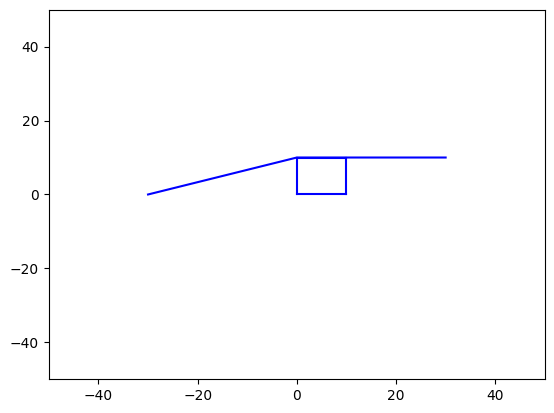

In [10]:

import matplotlib.pyplot as plt 
  
# plot lines 

edges = graph.visgraph.get_edges()


for edge in graph.visgraph.get_edges() if graph.visgraph else []:
    plt.plot([edge.p1.x, edge.p2.x], [edge.p1.y, edge.p2.y], color='blue')

path_x = []
path_y = []

for point in graph.shortest_path(vg.Point(-30, 0), destination=vg.Point(30, 10)):
    path_x.append(point.x)
    path_y.append(point.y)

plt.plot(path_x, path_y, color='blue')

plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.show()

[<POLYGON ((1 1, 1 2, 2 2, 2 1, 1 1))>, <POLYGON ((3 3, 3 4, 4 4, 4 3, 3 3))>]


100%|██████████| 1/1 [00:00<00:00, 569.11it/s]


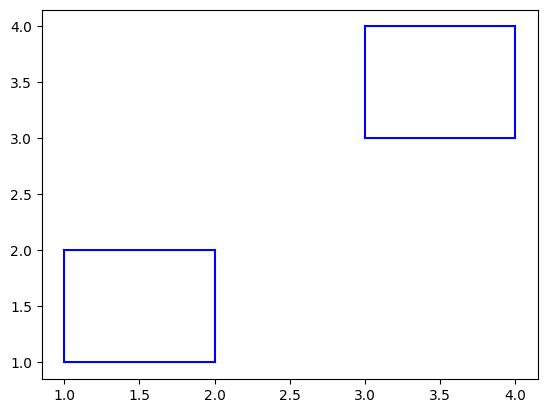

In [18]:
# Shapely demo

import matplotlib.pyplot as plt

import shapely
import shapely.ops

import pyvisgraph as vg

poligons = [
    [vg.Point(1, 1), vg.Point(1, 2), vg.Point(2, 2), vg.Point(2, 1)],
    [vg.Point(3, 3), vg.Point(3, 4), vg.Point(4, 4), vg.Point(4, 3)],
    #[vg.Point(1.5, 1.5), vg.Point(1.5, 2.5), vg.Point(2.5, 2.5), vg.Point(2.5, 1.5)]
]

shapely_poligons = [shapely.Polygon([(point.x, point.y) for point in poligon]) for poligon in poligons]

print(shapely_poligons)

# Convert shapely polygons to a list[list[vg.Point]]

shapely_poligons_union = shapely.ops.unary_union(shapely_poligons)


new_poligons = [[vg.Point(x, y) for x, y in shapely_poligon.exterior.coords] for shapely_poligon in shapely_poligons_union.geoms]

graph = vg.VisGraph()

graph.build(new_poligons, workers=1, status=True)

axes = plt.subplot()

for edge in graph.graph.get_edges():
    axes.plot(
        [edge.p1.x, edge.p2.x], [edge.p1.y, edge.p2.y], color="blue"
    )


